First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopi

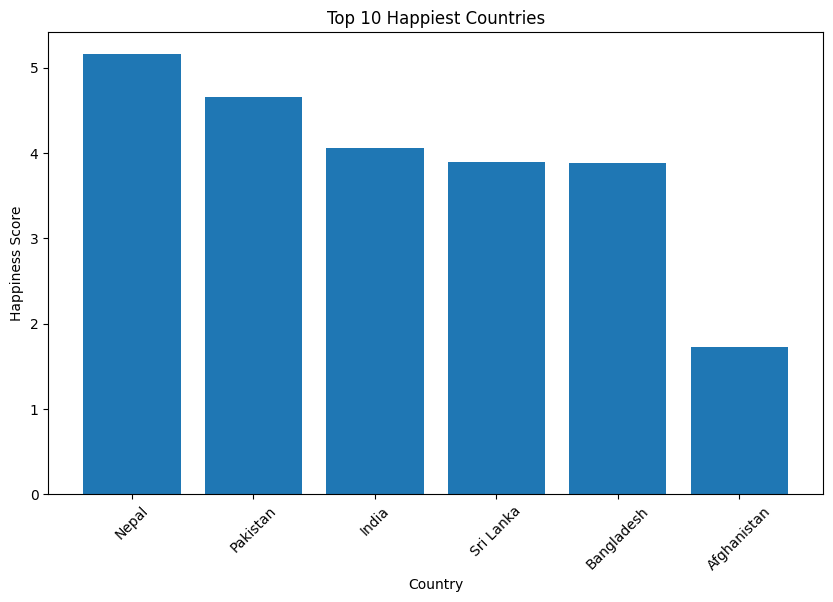

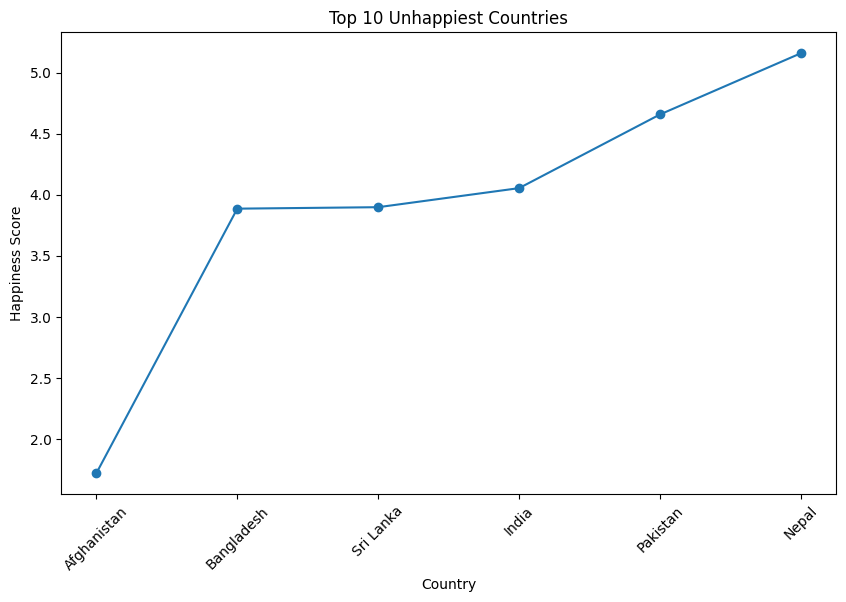

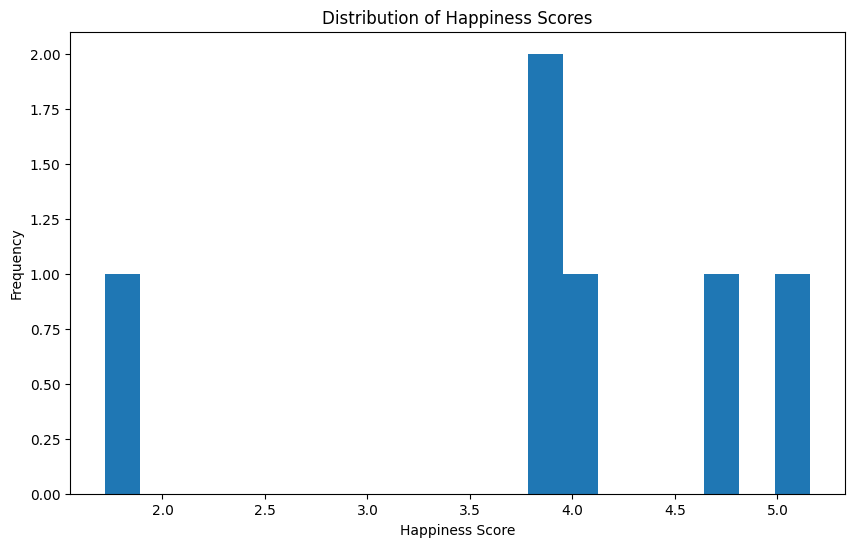

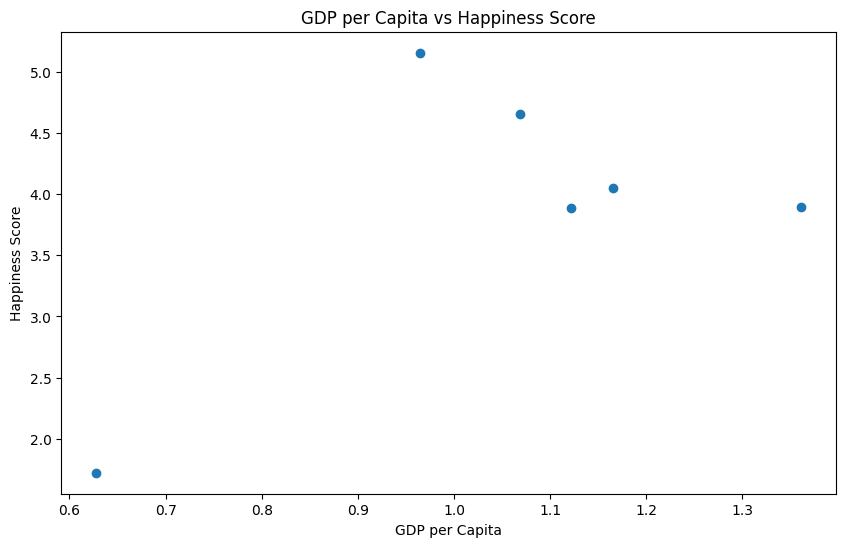

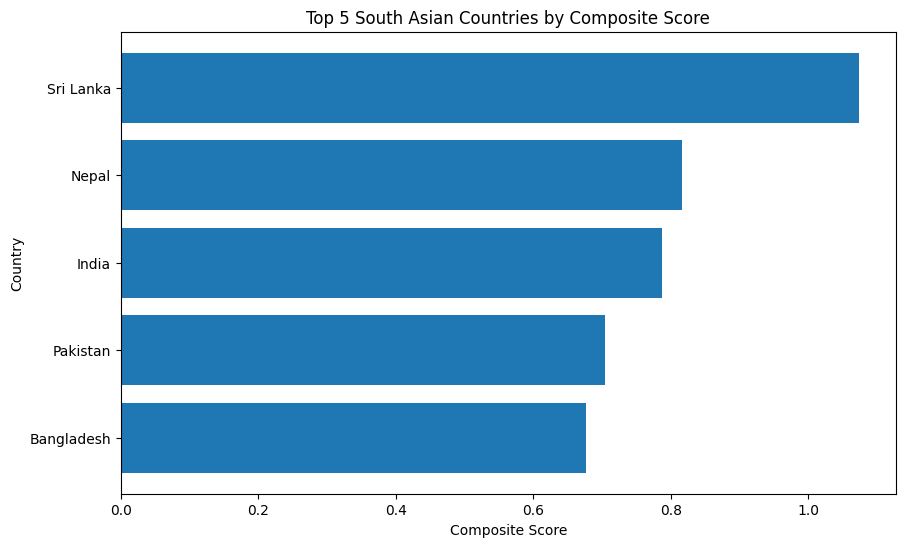

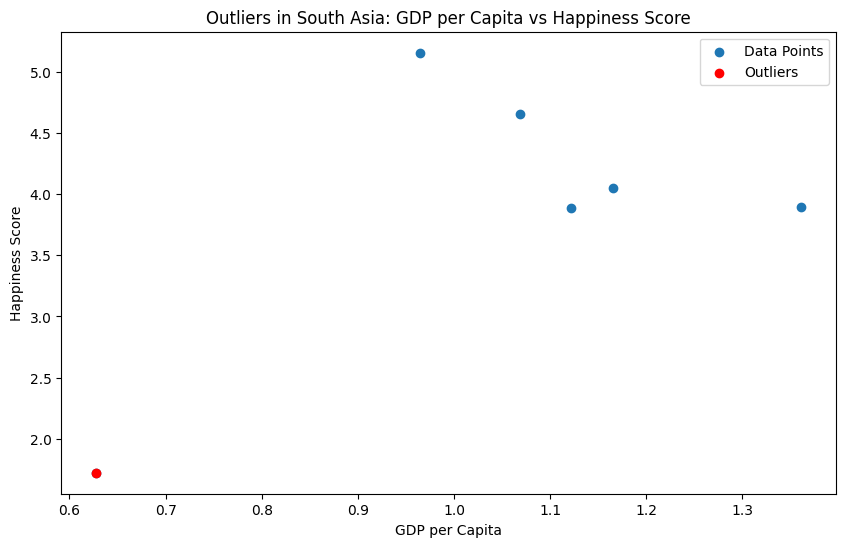

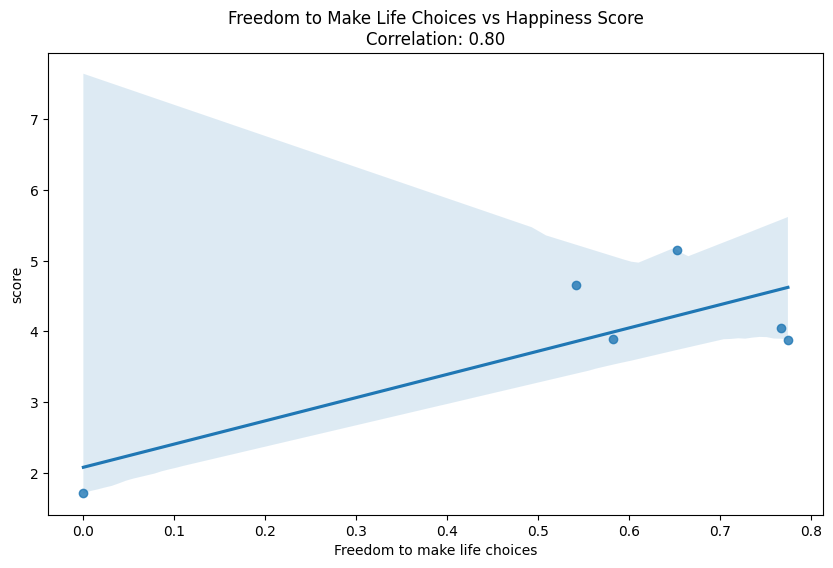

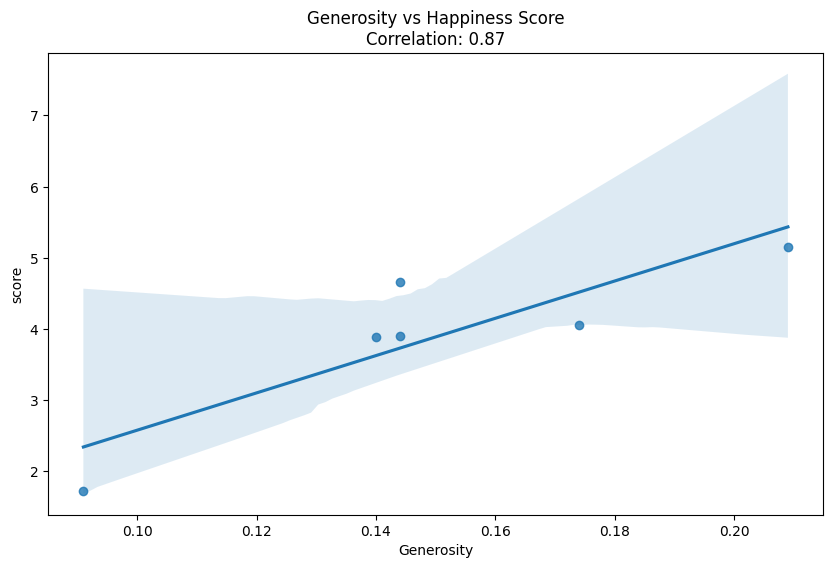

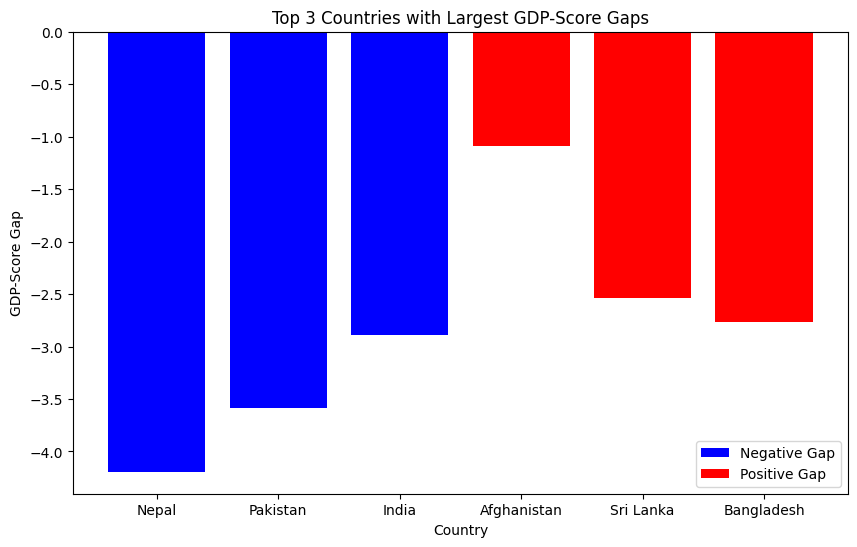

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI-ML/WHR-2024-5CS037.csv')

# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Get the number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}, Number of columns: {cols}")

# List all columns and their data types
print("\nColumn names and their data types:")
print(df.dtypes)

# Print the column names to identify the exact name of the 'Country' and 'Score' columns
print("\nColumn names:")
print(df.columns)

# Identify the correct column name for 'Score' and 'Country'
score_column = [col for col in df.columns if 'score' in col.lower()][0]
country_column = [col for col in df.columns if 'country' in col.lower()][0]

# Calculate mean, median, and standard deviation for the Score column
mean_score = df[score_column].mean()
median_score = df[score_column].median()
std_score = df[score_column].std()

print("\nStatistics for the Score column:")
print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_score}")

# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df[score_column].idxmax()][country_column]
lowest_score_country = df.loc[df[score_column].idxmin()][country_column]

print("\nCountries with the highest and lowest scores:")
print(f"Country with the highest score: {highest_score_country}")
print(f"Country with the lowest score: {lowest_score_country}")

# Check if there are any missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)

# Filter the dataset to show only the countries with a Score greater than 7.5
filtered_df = df[df[score_column] > 7.5]

# Sort the dataset by GDP per Capita in descending order and display the top 10 rows
gdp_column = [col for col in df.columns if 'gdp' in col.lower() and 'capita' in col.lower()][0]
sorted_filtered_df = filtered_df.sort_values(by=gdp_column, ascending=False).head(10)
print("\nTop 10 countries with a Score greater than 7.5, sorted by GDP per Capita:")
print(sorted_filtered_df)

# Plot the top 10 happiest countries by Score using a bar chart
top_10_happiest = df.nlargest(10, score_column)
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest[country_column], top_10_happiest[score_column])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 unhappiest countries by Score using a line chart
top_10_unhappiest = df.nsmallest(10, score_column)
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest[country_column], top_10_unhappiest[score_column], marker='o')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()

# Plot a histogram for the Score column to show its distribution
plt.figure(figsize=(10, 6))
plt.hist(df[score_column], bins=20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

# Plot a scatter plot between GDP per Capita and Score
plt.figure(figsize=(10, 6))
plt.scatter(df[gdp_column], df[score_column])
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs Happiness Score')
plt.show()

# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# Filter the dataset for South Asian countries
south_asia_df = df[df[country_column].isin(south_asian_countries)]
# Save the filtered dataframe as a separate CSV file in the current working directory
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)

# Create a new column called Composite Score
south_asia_df['Composite Score'] = 0.40 * south_asia_df[gdp_column] + 0.30 * south_asia_df['Social support'] + 0.30 * south_asia_df['Healthy life expectancy']
# Rank the South Asian countries based on the Composite Score in descending order
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Visualize the top 5 countries using a horizontal bar chart showing the Composite Score
top_5_composite = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite[country_column], top_5_composite['Composite Score'])
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

# Identify outliers in South Asia based on their Score and GDP per Capita using the 1.5 × IQR rule
Q1 = south_asia_df[gdp_column].quantile(0.25)
Q3 = south_asia_df[gdp_column].quantile(0.75)
IQR = Q3 - Q1
outliers = south_asia_df[(south_asia_df[gdp_column] < (Q1 - 1.5 * IQR)) | (south_asia_df[gdp_column] > (Q3 + 1.5 * IQR))]

# Create a scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df[gdp_column], south_asia_df[score_column], label='Data Points')
plt.scatter(outliers[gdp_column], outliers[score_column], color='red', label='Outliers')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outliers in South Asia: GDP per Capita vs Happiness Score')
plt.legend()
plt.show()

# Calculate the Pearson correlation between selected metrics and the Score
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df[score_column])
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df[score_column])

# Create scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y=score_column, data=south_asia_df)
plt.title(f'Freedom to Make Life Choices vs Happiness Score\nCorrelation: {correlation_freedom:.2f}')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y=score_column, data=south_asia_df)
plt.title(f'Generosity vs Happiness Score\nCorrelation: {correlation_generosity:.2f}')
plt.show()

# Add a new column GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df[gdp_column] - south_asia_df[score_column]
# Rank the South Asian countries by this gap in both ascending and descending order
gap_sorted_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True).head(3)
gap_sorted_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)

# Highlight the top 3 countries with the largest positive and negative gaps using bar charts
plt.figure(figsize=(10, 6))
plt.bar(gap_sorted_asc[country_column], gap_sorted_asc['GDP-Score Gap'], color='blue', label='Negative Gap')
plt.bar(gap_sorted_desc[country_column], gap_sorted_desc['GDP-Score Gap'], color='red', label='Positive Gap')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest GDP-Score Gaps')
plt.legend()
plt.show()

# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
# Filter the dataset for Middle Eastern countries
middle_east_df = df[df[country_column].isin(middle_east_countries)]

# Calculate the mean and standard deviation of the score for both South Asia and Middle East
south_asia_mean = south_asia_df[score_column].mean()
south_asia_std = south_asia_df[score_column].std()
middle_east_mean = middle_east_df[score_column].mean()
middle_east_std = middle_east_df[score_column].std()
